In [1]:
#import libraries
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.metrics.cluster import v_measure_score

In [2]:
class cluster:
    def __init__(self):
        pass
    def fit(self, X):
        pass

In [125]:
class KMeans(cluster):
    def __init__(self, k =5, tolerance = 0.0001, max_iterations = 100):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
    def fit(self,data):
        self.centroids=[]
        #randomly initialize the means
        for i in range(self.k):
              self.centroids.append(data[i])
        for i in range(self.max_iterations):
            #assign the data points that they belong to
            #create empty clusters
            clusters=[]
            for j in range(self.k):
                clusters.append([])
                predictions=[]
            for point in data:
                #find distance to all the means values
                distances=[((point-m)**2).sum() for m in self.centroids]
                #find the minimum distance
                minDistance=min(distances)
                #find the mean for which we got the min distance
                l=distances.index(minDistance)
                #add this point to the cluster
                clusters[l].append(point)
                predictions.append(l)
        #calculate the new mean values
            change=False
            for j in range(self.k):
                new_mean=np.average(clusters[j],axis=0)
                if not np.array_equal(self.centroids[j],new_mean):
                    change=True
                self.centroids[j]=new_mean
                if not change:
                    break
        print(predictions)
        print(*self.centroids, sep = ", ")  
    
    
    def fit_extended(self,data,balanced='false'):
        if balanced == 'true':
            self.centroids=[]
            maxval=len(data)/self.k
            #randomly initialize the means
            for i in range(self.k):
                self.centroids.append(data[i])
            for i in range(self.max_iterations):
                clusters=[]
            for j in range(self.k):
                clusters.append([])
                predictions=[]
            for point in data:
                #find distance to all the means values
                distances=[((point-m)**2).sum() for m in self.centroids]
            
                new_arr = distances.copy()
                #sort the array to get min distance
                new_arr.sort()
                #find the mean for which we got the min distance
                l=distances.index(new_arr[0])
                #if maxval already reached assign to second shortest centroid
                if len(clusters[l]) == maxval :
                    l=distances.index(new_arr[1])
                clusters[l].append(point)
                predictions.append(l)
            #calculate the new mean values
            change=False
            for j in range(self.k):
                new_mean=np.average(clusters[j],axis=0)
                if not np.array_equal(self.centroids[j],new_mean):
                    change=True
                self.centroids[j]=new_mean
                if not change:
                    break
        
            print(predictions)
            print(*self.centroids, sep = ", ")              
        else :
            self.fit(X)

In [126]:
X= np.array([ [0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10] ])
print (X.shape)

(8, 2)


In [127]:
k_means=KMeans(k=2)
k_means.fit(X)

[0, 0, 0, 0, 1, 1, 1, 1]
[1. 1.], [9. 9.]


In [115]:
# list of the cluster hypotheses, one for each instance.
k_means.predict(X)

[0, 0, 0, 0, 1, 1, 1, 1]

# first four instances belong to one cluster and the second four belong to a different cluster.

In [116]:
#list containing lists of the cluster centroids values.

k_means.centroids

[array([1., 1.]), array([9., 9.])]

# values for the first and second centroid, respectively.

In [130]:
# Generate data
X, cluster_assignments = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)

In [131]:
cluster_assignments

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

In [132]:
print (X.shape)

(200, 2)


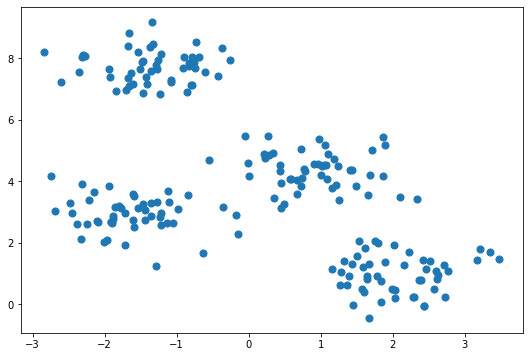

In [133]:
plt.figure(figsize=(9,6))
plt.scatter(X[:, 0], X[:, 1], s=50)

In [134]:
kmeans=KMeans(k=4,max_iterations = 100)
kmeans.fit(X)

[0, 1, 2, 3, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 3, 3, 3, 0, 3, 1, 0, 1, 0, 0, 3, 0, 0, 2, 3, 2, 1, 0, 1, 2, 1, 2, 2, 3, 3, 3, 3, 2, 0, 1, 2, 3, 3, 2, 3, 1, 1, 3, 2, 3, 1, 0, 2, 0, 3, 2, 0, 2, 3, 2, 0, 3, 1, 1, 0, 0, 2, 2, 1, 3, 1, 1, 0, 0, 3, 2, 0, 1, 1, 2, 2, 0, 1, 1, 3, 3, 3, 2, 2, 0, 1, 3, 2, 2, 3, 0, 0, 3, 3, 1, 2, 0, 0, 2, 3, 1, 1, 0, 0, 2, 1, 1, 3, 2, 3, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 3, 3, 1, 3, 3, 0, 3, 0, 1, 0, 0, 1, 0, 2, 0, 1, 3, 3, 3, 2, 1, 0, 2, 3, 1, 3, 0, 3, 0, 0, 1, 1, 3, 2, 0, 0, 1, 0, 2, 1, 3, 3, 3, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 3, 2, 3, 0, 0, 2, 3, 1, 1, 1, 2, 3, 0]
[2.07187892 0.97422926], [-1.62401415  2.9159629 ], [0.90793962 4.35713791], [-1.34842715  7.72096548]


In [135]:
y_kmeans=[0, 1, 2, 3, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 3, 3, 3, 0, 3, 1, 0, 1, 0, 0, 3, 0, 0, 2, 3, 2, 1, 0, 1, 2, 1, 2, 2, 3, 3, 3, 3, 2, 0, 1, 2, 3, 3, 2, 3, 1, 1, 3, 2, 3, 1, 0, 2, 0, 3, 2, 0, 2, 3, 2, 0, 3, 1, 1, 0, 0, 2, 2, 1, 3, 1, 1, 0, 0, 3, 2, 0, 1, 1, 2, 2, 0, 1, 1, 3, 3, 3, 2, 2, 0, 1, 3, 2, 2, 3, 0, 0, 3, 3, 1, 2, 0, 0, 2, 3, 1, 1, 0, 0, 2, 1, 1, 3, 2, 3, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 3, 3, 1, 3, 3, 0, 3, 0, 1, 0, 0, 1, 0, 2, 0, 1, 3, 3, 3, 2, 1, 0, 2, 3, 1, 3, 0, 3, 0, 0, 1, 1, 3, 2, 0, 0, 1, 0, 2, 1, 3, 3, 3, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 3, 2, 3, 0, 0, 2, 3, 1, 1, 1, 2, 3, 0]
v_measure_score(cluster_assignments,y_kmeans)

1.0

V_measure_score is 1.0, it means cluster assignments are properly aligned.

In [136]:
kmeans_ext=KMeans(k=4,max_iterations = 100)
kmeans_ext.fit_extended(X,'true')

[0, 1, 2, 3, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 0, 2, 3, 3, 3, 0, 3, 1, 0, 1, 0, 0, 3, 0, 0, 2, 3, 2, 1, 0, 1, 2, 1, 2, 2, 3, 3, 3, 3, 2, 0, 1, 2, 3, 3, 2, 3, 1, 1, 3, 2, 3, 1, 0, 2, 0, 3, 2, 0, 2, 3, 2, 0, 3, 1, 1, 0, 0, 2, 2, 1, 3, 1, 1, 0, 0, 3, 2, 0, 1, 1, 2, 2, 0, 1, 1, 3, 3, 3, 2, 2, 0, 1, 3, 2, 2, 3, 0, 0, 3, 3, 1, 2, 0, 0, 2, 3, 1, 1, 0, 0, 2, 1, 1, 3, 2, 3, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 3, 3, 1, 3, 3, 0, 3, 0, 1, 0, 0, 1, 0, 2, 0, 1, 3, 3, 3, 2, 1, 0, 2, 3, 1, 3, 0, 3, 0, 0, 1, 1, 3, 2, 0, 0, 1, 0, 2, 1, 3, 3, 3, 2, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 3, 2, 3, 0, 0, 2, 3, 1, 1, 1, 2, 3, 0]
[2.07187892 0.97422926], [-1.62401415  2.9159629 ], [0.90793962 4.35713791], [-1.34842715  7.72096548]


In [138]:
y_kmeans

1.0

In [ ]:
v_measure_score(cluster_assignments,y_kmeans)

V_measure_score is 1.0, it means cluster assignments are properly aligned.


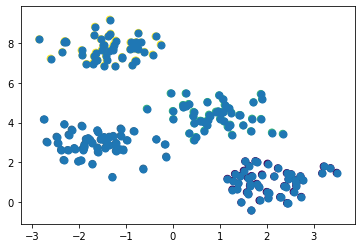

In [139]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.centroids
plt.scatter(X[:, 0], X[:, 1], s=50)